In [23]:
import pandas as pd
import string
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [24]:
data=pd.read_csv('test_data.csv', encoding='gbk')
data.head()

,File_Name,Book,Statement,Category,Emotion_Valence,Emotion,Arousal
0,R1,1984,This one also cut me terribly.,Emotional_Engagement,Negative,Anger,5.0
1,R1,1984,"It's unbelievable to me that he's like this, I...",Emotional_Engagement,Positive,Excitement,4.0
2,R1,1984,"It looked so radical, a radical society like t...",Emotional_Engagement,Neutral,Connectedness,1.0
3,R1,1984,I think it somehow confirmed that certain emot...,Emotional_Engagement,Negative,Fear,5.0
4,R1,1984,I had this biggest fear and was afraid of that...,Emotional_Engagement,Negative,Fear,5.0


In [25]:
def counts_word(statement):
    words = statement.split()  
    words = [word for word in words if word not in string.punctuation]
    return len(words)

data['Word_Count'] = data['Statement'].apply(counts_word)
data.head()

,File_Name,Book,Statement,Category,Emotion_Valence,Emotion,Arousal,Word_Count
0,R1,1984,This one also cut me terribly.,Emotional_Engagement,Negative,Anger,5.0,6
1,R1,1984,"It's unbelievable to me that he's like this, I...",Emotional_Engagement,Positive,Excitement,4.0,35
2,R1,1984,"It looked so radical, a radical society like t...",Emotional_Engagement,Neutral,Connectedness,1.0,16
3,R1,1984,I think it somehow confirmed that certain emot...,Emotional_Engagement,Negative,Fear,5.0,16
4,R1,1984,I had this biggest fear and was afraid of that...,Emotional_Engagement,Negative,Fear,5.0,19


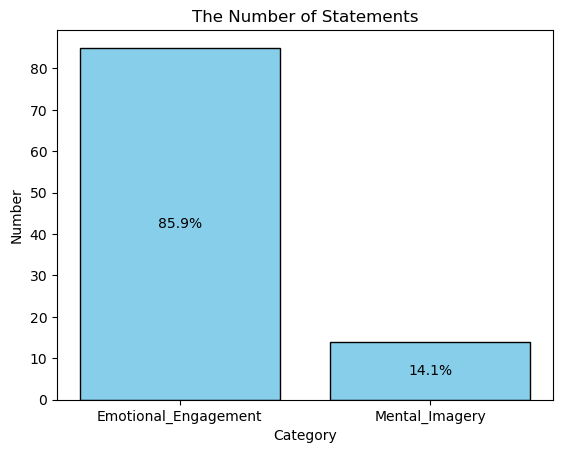

In [26]:
#The number of emotional engagement and mental imagery statements
men_emo = data['Category'].value_counts()

total = men_emo.sum()
proportions = men_emo / total

bars = plt.bar(men_emo.index, men_emo.values, color='skyblue', edgecolor='black')

for bar, proportion in zip(bars, proportions):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{proportion:.1%}', ha='center', va='center', color='black', fontsize=10)

plt.title('The Number of Statements')
plt.xlabel('Category')
plt.ylabel('Number')

plt.show()


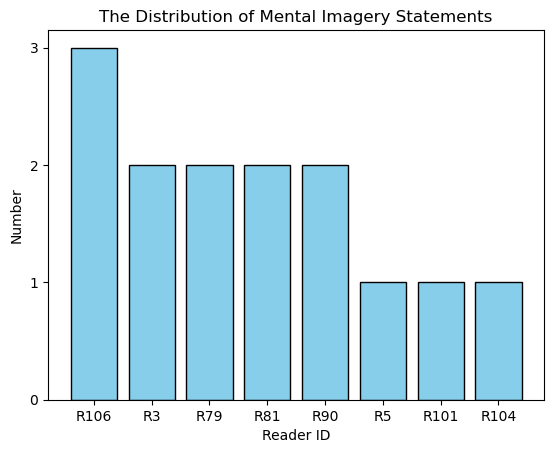

In [27]:
#The distribution of mental imagery statements
me = data[data['Category'] == 'Mental_Imagery']
men_dis = me['File_Name'].value_counts()

plt.bar(men_dis.index, men_dis.values, color='skyblue', edgecolor='black')

plt.title('The Distribution of Mental Imagery Statements')
plt.xlabel('Reader ID')
plt.ylabel('Number')

plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()


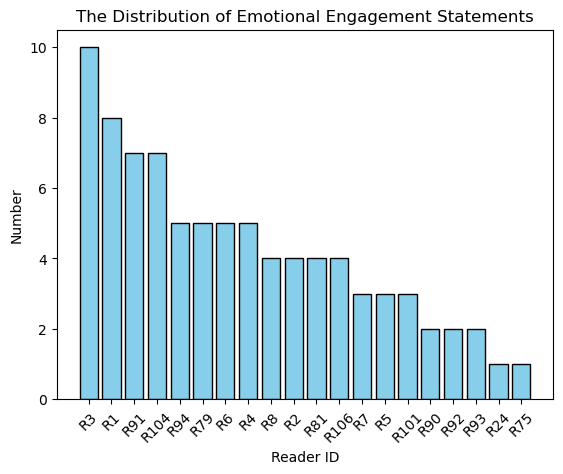

In [28]:
# The distribution of emotional engagement statements
em = data[data['Category'] == 'Emotional_Engagement']
emo_dis = em['File_Name'].value_counts()

plt.bar(emo_dis.index, emo_dis.values, color='skyblue', edgecolor='black')

plt.title('The Distribution of Emotional Engagement Statements')
plt.xlabel('Reader ID')
plt.ylabel('Number')

plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=45)
plt.show()

In [29]:
# Average number of words for mental imagery and emotional engagement statements
def avg_word(data):
    avg_word=data['Word_Count'].sum()/data['Word_Count'].count()
    return avg_word

avg=data.groupby('Category').apply(avg_word)
avg

Category
Emotional_Engagement    11.482353
Mental_Imagery          15.785714
dtype: float64

In [30]:
# Average number of words for statements containing negative, positive and neutral emotions

avg_emotions=data.groupby('Emotion_Valence').apply(avg_word)
avg_emotions

Emotion_Valence
Negative    10.734694
Neutral     12.866667
Positive    12.238095
dtype: float64

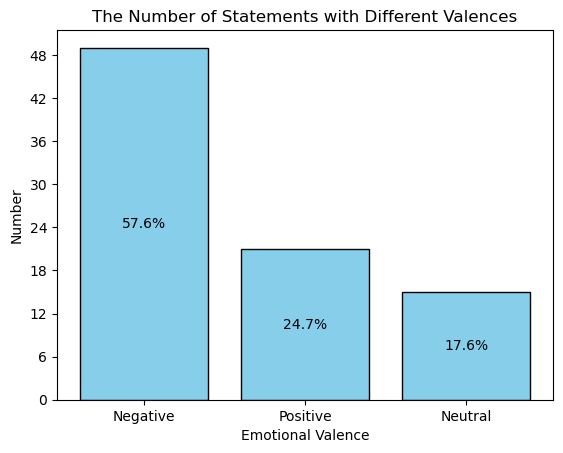

In [31]:
#The number of emotional engagement statements with three different valences
emo_num = data['Emotion_Valence'].value_counts()

total = emo_num.sum()
proportions = emo_num / total

bars = plt.bar(emo_num.index, emo_num.values, color='skyblue', edgecolor='black')

for bar, proportion in zip(bars, proportions):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{proportion:.1%}', ha='center', va='center', color='black', fontsize=10)

plt.title('The Number of Statements with Different Valences')
plt.xlabel('Emotional Valence')
plt.ylabel('Number')

plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()


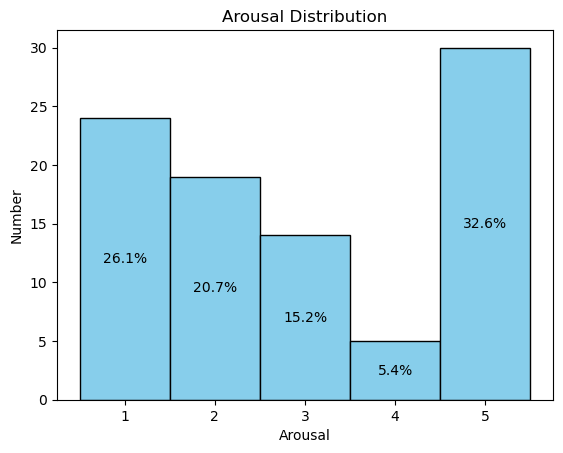

In [32]:
# Distribution of arousal values in emotional engagement statements
arousal_data = pd.read_csv('emotional_data.csv', encoding='gbk')
arousal_values = arousal_data['Arousal']

counts, bins, patches = plt.hist(arousal_values, bins=[x - 0.5 for x in range(1, 7)], color='skyblue', edgecolor='black')

total = counts.sum()
proportions = counts / total

for count, proportion, patch in zip(counts, proportions, patches):
    height = patch.get_height()
    plt.text(
        patch.get_x() + patch.get_width() / 2,  # x-coordinate: middle of the bar
        height / 2,  # y-coordinate: middle of the height of the bar
        f'{proportion:.1%}',  # proportion text
        ha='center',  # horizontal alignment: center
        va='center',  # vertical alignment: center
        color='black',  # text color
        fontsize=10  # font size
    )

plt.title('Arousal Distribution')
plt.xlabel('Arousal')
plt.ylabel('Number')

plt.xticks(range(1, 6))

plt.show()



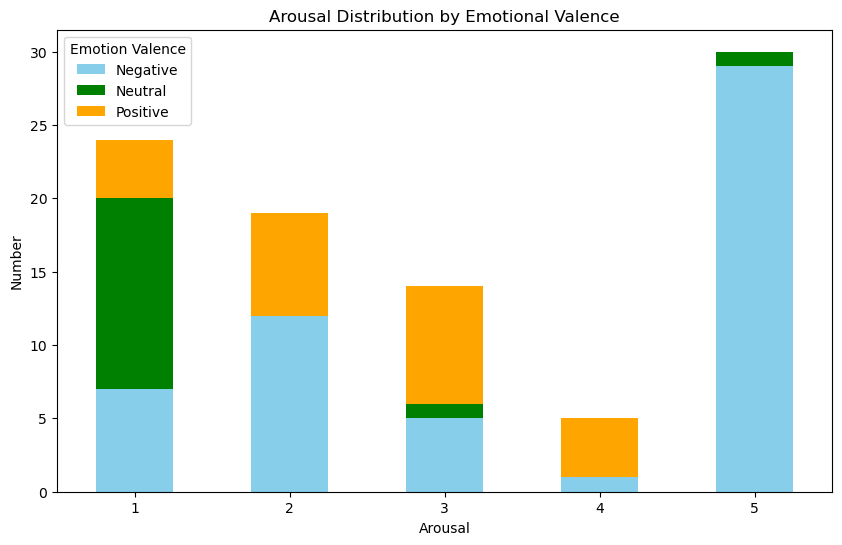

In [33]:
# Arousal distribution by three emotional valences
arousal_emotion_counts = arousal_data.groupby(['Arousal', 'Emotion_Valence']).size().unstack().fillna(0)

color_mapping = {'Positive': 'orange', 'Negative': 'skyblue', 'Neutral': 'green'}

fig, ax = plt.subplots(figsize=(10, 6))
arousal_emotion_counts.plot(kind='bar', stacked=True, color=[color_mapping[col] for col in arousal_emotion_counts.columns], ax=ax)


plt.title('Arousal Distribution by Emotional Valence')
plt.xlabel('Arousal')
plt.ylabel('Number')
plt.legend(title='Emotion Valence')
plt.xticks(rotation=0)

plt.show()

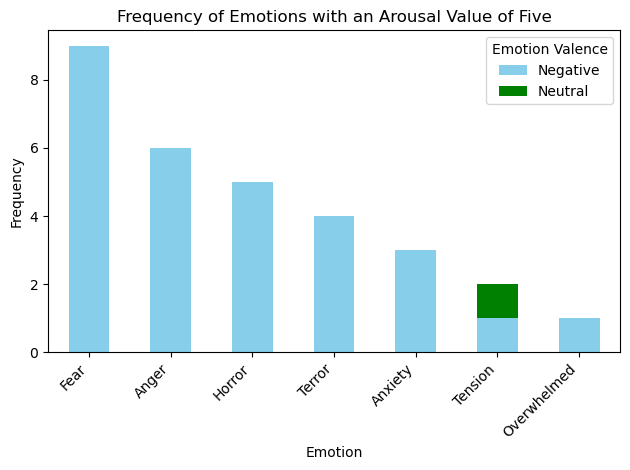

In [34]:
# Frequency of emotions with an arousal value of five
arousal_five = arousal_data[arousal_data['Arousal'] == 5.0]
emotion_total_counts = arousal_five['Emotion'].value_counts()
sorted_emotions = emotion_total_counts.index
emotion_valence_counts = arousal_five.groupby(['Emotion', 'Emotion_Valence']).size().unstack().fillna(0)
emotion_valence_counts = emotion_valence_counts.reindex(sorted_emotions)
color_mapping = {'Positive': 'orange', 'Negative': 'skyblue', 'Neutral': 'green'}
ax = emotion_valence_counts.plot(kind='bar', stacked=True, color=[color_mapping[valence] for valence in emotion_valence_counts.columns])

plt.title('Frequency of Emotions with an Arousal Value of Five')
plt.xlabel('Emotion')
plt.ylabel('Frequency')

ax.set_xticklabels(emotion_valence_counts.index, rotation=45, ha='right')

plt.legend(title='Emotion Valence')

plt.tight_layout()

plt.show()


<Figure size 1000x600 with 0 Axes>

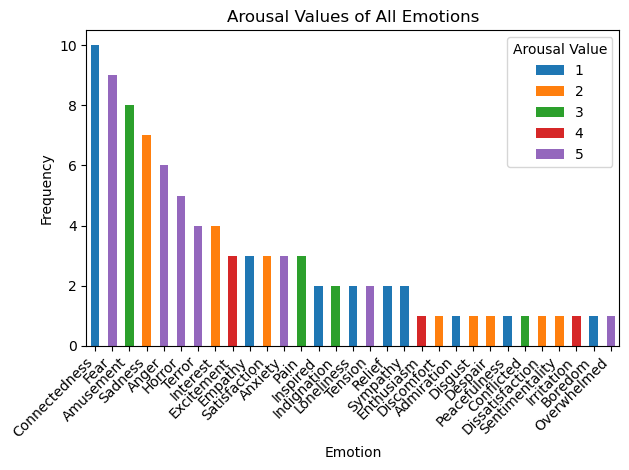

In [35]:
# Arousal values of all emotions
emotion_arousal_counts = arousal_data.groupby(['Emotion', 'Arousal']).size().unstack().fillna(0)

emotion_total_counts = arousal_data['Emotion'].value_counts()
sorted_emotions = emotion_total_counts.sort_values(ascending=False).index

emotion_arousal_counts_sorted = emotion_arousal_counts.reindex(sorted_emotions)

plt.figure(figsize=(10, 6))
emotion_arousal_counts_sorted.plot(kind='bar', stacked=True)
plt.title('Arousal Values of All Emotions')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.legend(title='Arousal Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

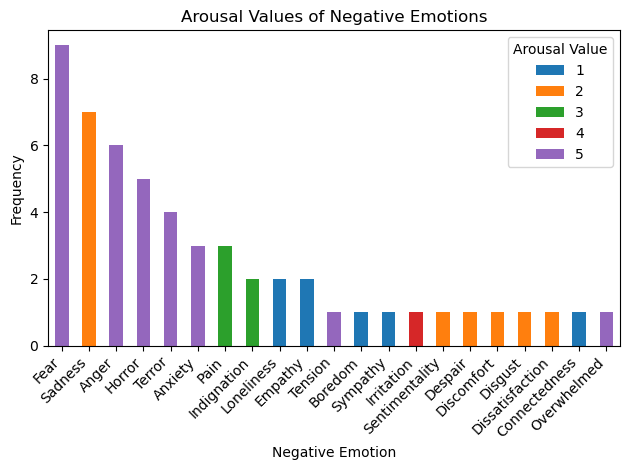

In [36]:
# Arousal values of all negative emotions
neg_emo = arousal_data[arousal_data['Emotion_Valence'] == 'Negative']

neg_emotion_arousal_counts = neg_emo.groupby(['Emotion', 'Arousal']).size().unstack().fillna(0)

neg_emotion_total_counts = neg_emo['Emotion'].value_counts()
sorted_neg_emotions = neg_emotion_total_counts.sort_values(ascending=False).index

neg_emotion_arousal_counts_sorted = neg_emotion_arousal_counts.reindex(sorted_neg_emotions)

plt.figure(figsize=(10, 6))
neg_emotion_arousal_counts_sorted.plot(kind='bar', stacked=True)
plt.title('Arousal Values of Negative Emotions')
plt.xlabel('Negative Emotion')
plt.ylabel('Frequency')
plt.legend(title='Arousal Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

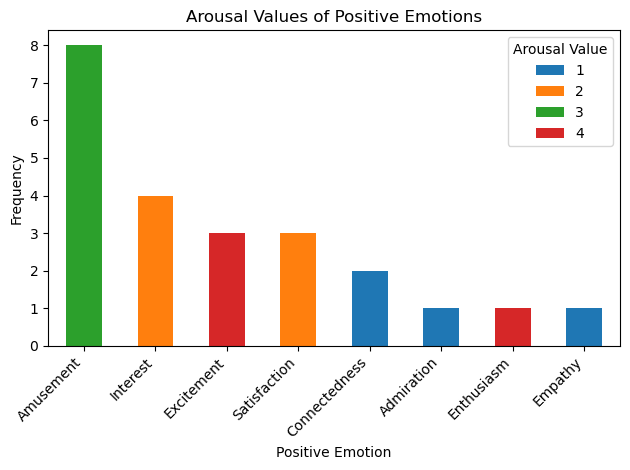

In [37]:
# Arousal values of all positive emotions
pos_emo = arousal_data[arousal_data['Emotion_Valence'] == 'Positive']

pos_emotion_arousal_counts = pos_emo.groupby(['Emotion', 'Arousal']).size().unstack().fillna(0)

pos_emotion_total_counts = pos_emo['Emotion'].value_counts()
sorted_pos_emotions = pos_emotion_total_counts.sort_values(ascending=False).index

pos_emotion_arousal_counts_sorted = pos_emotion_arousal_counts.reindex(sorted_pos_emotions)

plt.figure(figsize=(10, 6))
pos_emotion_arousal_counts_sorted.plot(kind='bar', stacked=True)
plt.title('Arousal Values of Positive Emotions')
plt.xlabel('Positive Emotion')
plt.ylabel('Frequency')
plt.legend(title='Arousal Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

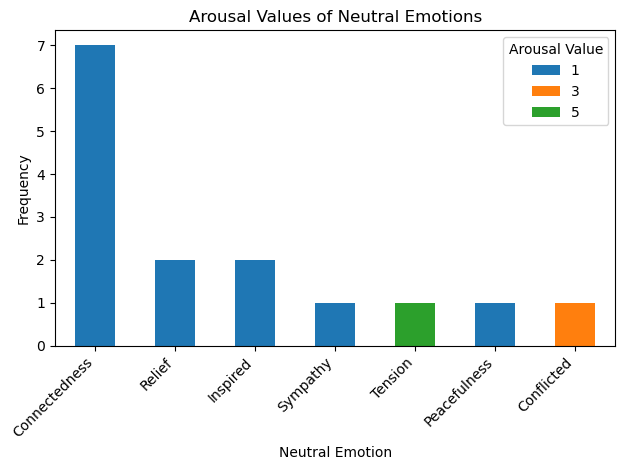

In [38]:
# Arousal values of all neutral emotions.
neu_emo = arousal_data[arousal_data['Emotion_Valence'] == 'Neutral']

neu_emotion_arousal_counts = neu_emo.groupby(['Emotion', 'Arousal']).size().unstack().fillna(0)

neu_emotion_total_counts = neu_emo['Emotion'].value_counts()
sorted_neu_emotions = neu_emotion_total_counts.sort_values(ascending=False).index

neu_emotion_arousal_counts_sorted = neu_emotion_arousal_counts.reindex(sorted_neu_emotions)

plt.figure(figsize=(10, 6))
neu_emotion_arousal_counts_sorted.plot(kind='bar', stacked=True)
plt.title('Arousal Values of Neutral Emotions')
plt.xlabel('Neutral Emotion')
plt.ylabel('Frequency')
plt.legend(title='Arousal Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

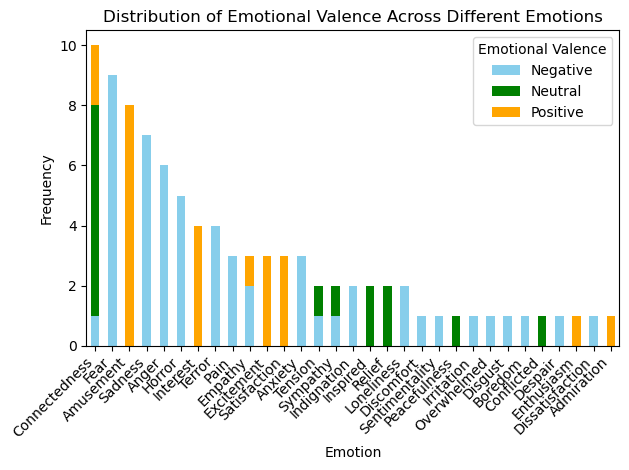

In [39]:
# Distribution of emotional valence across different emotions
emotion_type_counts = arousal_data.groupby('Emotion')['Emotion_Valence'].value_counts().unstack().fillna(0)

emotion_type_counts['Total'] = emotion_type_counts.sum(axis=1)
emotion_type_counts = emotion_type_counts.sort_values(by='Total', ascending=False).drop(columns='Total')

color_mapping = {'Neutral': 'green', 'Positive': 'orange', 'Negative': 'skyblue'}

plt.figure(figsize=(10, 6))
emotion_type_counts.plot(kind='bar', stacked=True, color=[color_mapping[col] for col in emotion_type_counts.columns])
plt.title('Distribution of Emotional Valence Across Different Emotions')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.legend(title='Emotional Valence')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
